In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,recall_score, precision_score, f1_score

In [2]:
df=pd.read_csv("student_data.csv")
df.head(5)

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


### 1b.

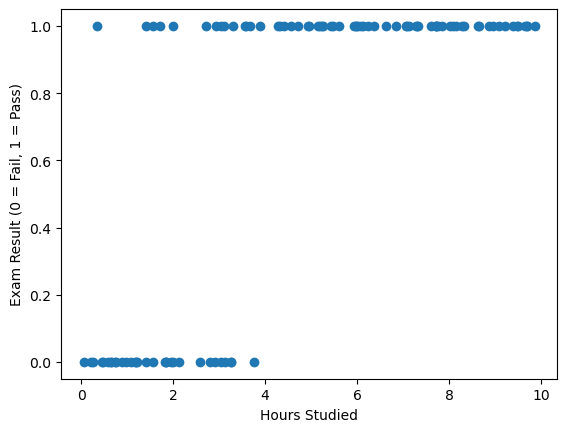

In [3]:
plt.scatter(df['Hours_Studied'], df['Results'])
plt.xlabel('Hours Studied')  
plt.ylabel('Exam Result (0 = Fail, 1 = Pass)')
plt.show()

In [4]:
X = df[['Hours_Studied','Review_Session']] 
y = df['Results']

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [5]:
print(model.intercept_)
print(model.coef_)

[-4.61182462]
[[1.36499215 1.87733756]]


In [6]:
y_pred = model.predict(X)

In [7]:
print('Accuracy:', accuracy_score(y, y_pred))
print('AUC:', roc_auc_score(y, model.predict_proba(X)[:,1])) 

print('Recall:', recall_score(y, y_pred))
print('Precision:', precision_score(y, y_pred))
print('F1:', f1_score(y, y_pred))

Accuracy: 0.93
AUC: 0.9761029411764706
Recall: 0.9264705882352942
Precision: 0.9692307692307692
F1: 0.9473684210526316


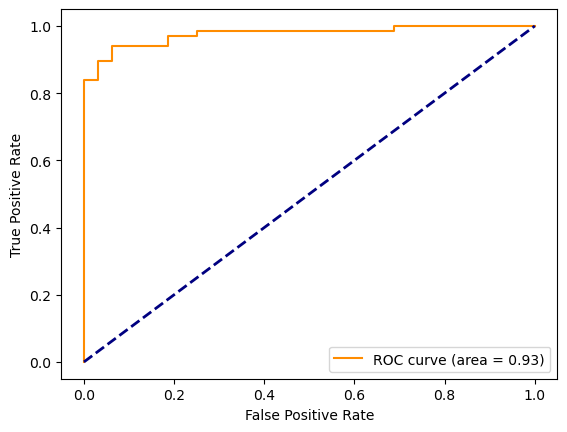

In [8]:
fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:,1])
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % accuracy_score(y, y_pred))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### 2

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Linear SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

# RBF SVM
svm_rbf = SVC(kernel='rbf')
gammas = np.logspace(-6, 2, 50)
param_grid = {'gamma': gammas}

svm_rbf_gs = GridSearchCV(svm_rbf, param_grid, cv=5)
svm_rbf_gs.fit(X, y)

print("Best RBF kernel gamma:", svm_rbf_gs.best_params_)

# Refit RBF SVM model with best gamma
svm_rbf = SVC(kernel='rbf', gamma=svm_rbf_gs.best_params_['gamma']) 
svm_rbf.fit(X, y)

print("Linear SVM Accuracy:", accuracy_score(y, svm_linear.predict(X)))
print("RBF SVM Accuracy:", accuracy_score(y, svm_rbf.predict(X)))

Best RBF kernel gamma: {'gamma': 0.025595479226995333}
Linear SVM Accuracy: 0.92
RBF SVM Accuracy: 0.92
